## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_csv = 'data/scraped_data.csv'


### Cleaning up table data

In [36]:
df = pd.read_csv(data_csv)
raw_df = df # in case this is needed for lookups

# ToDo: Maybe convert into methods to tidy up this section

# Remove duplidate rows
df = df.drop_duplicates()

# Drop some not very useful columns
df = df.drop('property_id', 1)
df = df.drop('environment', 1)
df = df.drop('page_name', 1)
df = df.drop('platform', 1)
df = df.drop('property_category', 1)
df = df.drop('seller_name', 1) # we have seller_id
df = df.drop('published_date', 1) # removing for now, since timespan is only a week
df = df.drop('facility', 1) # this has been split up into individual fiels
df = df.drop('property_type', 1)  # property_type seems to always be apartment print(df.loc[df['property_type'] != 'apartment'])
df = df.drop('lease_units', 1) # lease_units seems to always be months  print(df.loc[df['lease_units'] != 'months'])
df = df.drop('county', 1) # county seems to always be Dublin   print(df.loc[df['county'] != 'Dublin'])
df = df.drop('currency', 1) # currency seems to always be €   print(df.loc[df['county'] != '€'])
df = df.drop('longitude', 1) # doesn't seem to correlate much with price
df = df.drop('latitude', 1) # doesn't seem to correlate much with price


#show missing values in each column
#print(df.isnull().sum())

# Group area names and replace with numbers
# df = df.replace({'area' : {
#     'Lusk' : 'North of Dublin',
#     'Skerries' : 'North of Dublin',
#     'Donabate' : 'North of Dublin',
#     'Balbriggan' : 'North of Dublin',
#     'Malahide' : 'North of Dublin',
#     'Portmarnock' : 'North of Dublin',
#     'Swords' : 'North of Dublin',
#     'Killiney' : 'South of Dublin',
#     'Booterstown' : 'South of Dublin',
#     'Stillorgan' : 'South of Dublin',
#     'Dun Laoghaire' : 'South of Dublin',
#     'Sandycove' : 'South of Dublin',
#     'Dalkey' : 'South of Dublin',
#     'Saggart' : 'South of Dublin',
#     'Shankill' : 'South of Dublin',
#     'Glenageary' : 'South of Dublin',
#     'Monkstown' : 'South of Dublin',
#     'Kilmacud' : 'South of Dublin',
#     'Blackrock' : 'South of Dublin',
#     'Citywest' : 'West of Dublin',
#     'Lucan' : 'West of Dublin',
#     'Rathcoole' : 'West of Dublin',
#     'North Wall' : 'Dublin 1',
#     'IFSC' : 'Dublin 1',
#     'Temple Bar' : 'Dublin 2',
#     'Grand Canal Dock' : 'Dublin 2',
#     'North Strand' : 'Dublin 3',
#     'Marino' : 'Dublin 3',
#     'Clontarf' : 'Dublin 3',
#     'Fairview' : 'Dublin 3',
#     'Ballybough' : 'Dublin 3',
#     'East Wall' : 'Dublin 3',
#     'Killester' : 'Dublin 3',
#     'Donnybrook' : 'Dublin 4',
#     'Ringsend' : 'Dublin 4',
#     'Ballsbridge' : 'Dublin 4',
#     'Sandymount' : 'Dublin 4',
#     'Merrion' : 'Dublin 4',
#     'Raheny' : 'Dublin 5',
#     'Dartry' : 'Dublin 6',
#     'Rathmines' : 'Dublin 6',
#     'Ranelagh' : 'Dublin 6',
#     'Milltown' : 'Dublin 6',
#     'Rathgar' : 'Dublin 6',
#     "Harold's Cross" : "Dublin 6W",
#     'Terenure' : "Dublin 6W",
#     'Kimmage' : "Dublin 6W",
#     'Arbour Hill': 'Dublin 7',
#     'Cabra': 'Dublin 7',
#     'Navan Road (D7)': 'Dublin 7',
#     'Phibsborough': 'Dublin 7',
#     'Smithfield': 'Dublin 7',
#     'North Circular Road': 'Dublin 7',
#     'Rialto': 'Dublin 8',
#     'Kilmainham': 'Dublin 8',
#     'Portobello': 'Dublin 8',
#     'Islandbridge': 'Dublin 8',
#     'Inchicore': 'Dublin 8',
#     'Christchurch': 'Dublin 8',
#     'South Circular Road': 'Dublin 8',
#     'Beaumont': 'Dublin 9',
#     'Drumcondra': 'Dublin 9',
#     'Santry': 'Dublin 9',
#     'Glasnevin': 'Dublin 9',
#     'Cherry Orchard': 'Dublin 10',
#     'Finglas': 'Dublin 11',
#     'Ballymun': 'Dublin 11',
#     'Ward': 'Dublin 11',
#     'Perrystown': 'Dublin 12',
#     'Drimnagh': 'Dublin 12',
#     'Bluebell': 'Dublin 12',
#     'Park West': 'Dublin 12',
#     'Clarehall': 'Dublin 13',  
#     'Donaghmede': 'Dublin 13',
#     'Ard Na Greine': 'Dublin 13',
#     'Baldoyle': 'Dublin 13',
#     'Sutton': 'Dublin 13',
#     'Howth': 'Dublin 13',
#     'Churchtown' : 'Dublin 14',
#     'Dundrum' : 'Dublin 14',
#     'Clonskeagh' : 'Dublin 14',
#     'Goatstown' : 'Dublin 14',
#     'Rathfarnham' : 'Dublin 14',
#     'Ashtown' : 'Dublin 15',
#     'Royal Canal Park' : 'Dublin 15',
#     'Clonsilla' : 'Dublin 15',
#     'Coolmine' : 'Dublin 15',
#     'Ongar' : 'Dublin 15',
#     'Blanchardstown': 'Dublin 15',
#     'Carpenterstown': 'Dublin 15',
#     'Clonee': 'Dublin 15',
#     'Castleknock': 'Dublin 15',
#     'Tyrrelstown' : 'Dublin 15',
#     'Porterstown' : 'Dublin 15',
#     'Knocklyon' : 'Dublin 16',
#     'Ballinteer' : 'Dublin 16',
#     'Balgriffin' : 'Dublin 17',
#     'Sandyford' : 'Dublin 18',
#     'Stepaside' : 'Dublin 18',
#     'Carrickmines' : 'Dublin 18',
#     'Foxrock' : 'Dublin 18',
#     'Leopardstown' : 'Dublin 18',
#     'Cabinteely' : 'Dublin 18',
#     'Rathmichael' : 'Dublin 18',
#     'Kilternan' : 'Dublin 18',
#     'Palmerstown': 'Dublin 20',
#     'Chapelizod': 'Dublin 20',
#     'Tallaght': 'Dublin 24',
#     'Ballycullen': 'Dublin 24',
#     'Kiltipper': 'Dublin 24',
#     'Clondalkin': 'Dublin 22'}})
areas = set(df['area'])
print(areas)
areas_dict = {x:float(i) for i,x in enumerate(areas)}
df['area'] = df['area'].map(areas_dict)

# Remove superexpensive exceptions
df = df.loc[df['price'] < 4300]
df = df.loc[df['price'] >= 500]

# Replace 'seller_type' values with numbers
df['seller_type'] = df['seller_type'].map({'agent': 1.0, 'private': 0.0})

# Replace 'furnished' values with numbers
df['furnished'] = df['furnished'].map({'yes': 1.0, 'no': 0.0, 'either': 3.0})

# Replace 'open_viewing' values with numbers
df['open_viewing'] = df['open_viewing'].map({'yes': 1.0, 'no': 0.0})

# Convert int values to floats
df['no_of_photos'] = df['no_of_photos'].astype(float)
df['available_for'] = df['available_for'].astype(float)
df['price'] = df['price'].astype(float)
df['beds'] = df['beds'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

# Replace True values with 1, False and NaN with 0
df = df.replace({True:1.0}).replace({False:0.0}).fillna(0.0)

# ToDo: available_from might be interesting after calculating timespan from ad date to available date?

print(df.info())
df.head()

{'Monkstown', 'Portobello', 'Portmarnock', 'Saggart', 'Coolmine', 'Clarehall', 'Malahide', 'Foxrock', 'East Wall', 'Dun Laoghaire', 'Ward', 'Churchtown', 'Cabra', 'Stillorgan', 'Lusk', 'Balgriffin', 'Killester', 'Donnybrook', 'Sandycove', "Harold's Cross", 'Arbour Hill', 'Clonsilla', 'Rathfarnham', 'Adamstown', 'Killiney', 'Dublin 1', 'Finglas', 'Kilmainham', 'Ballymun', 'Howth', 'Kiltipper', 'Kilternan', 'Ongar', 'Royal Canal Park', 'Phibsborough', 'North Strand', 'Rathmichael', 'Swords', 'Rathmines', 'Islandbridge', 'Dublin 4', 'Clontarf', 'Ballybough', 'Goatstown', 'Leopardstown', 'Ballinteer', 'Balbriggan', 'Clongriffin', 'Milltown', 'Citywest', 'Blanchardstown', 'Knocklyon', 'Grand Canal Dock', 'Dublin 2', 'Clonee', 'Santry', 'Perrystown', 'Clonskeagh', 'Rialto', 'Palmerstown', 'Sandymount', 'Skerries', 'Donabate', 'North Circular Road', 'Tallaght', 'Donaghmede', 'Marino', 'Ranelagh', 'Blackrock', 'Castleknock', 'Kilmacud', 'Merrion', 'Carrickmines', 'Rathgar', 'Smithfield', 'Glen

,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,bathrooms,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,64.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,53.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,9.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,"109 Geraldstown Wood, Santry, Dublin 9",11.0,1.0,1.0,6.0,2017-09-13,12.0,55.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,"11 saunders house, spencer dock, Dublin 1, Dub...",0.0,0.0,0.0,10.0,2017-09-16,0.0,25.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print ("Dimension of train data {}".format(df.shape))

Dimension of train data (1092, 27)


In [38]:
df.describe()

,seller_id,seller_type,open_viewing,no_of_photos,available_for,area,furnished,bathrooms,beds,price,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,...,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,3553.377289,0.680403,0.014652,10.911172,9.307692,61.467033,1.045788,1.467033,1.807692,2068.162088,...,0.868132,0.208791,0.015568,0.091575,0.796703,0.783883,0.011905,0.548535,0.226190,0.564103
std,4062.568466,0.466534,0.120211,7.388672,5.016436,32.947223,0.434226,0.652017,1.518482,754.910353,...,0.338502,0.406631,0.123853,0.288557,0.402636,0.411784,0.108507,0.497867,0.418556,0.496101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,834.500000,1.000000,0.000000,9.000000,12.000000,55.000000,1.000000,1.000000,2.000000,1800.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,7772.250000,1.000000,0.000000,14.000000,12.000000,92.000000,1.000000,2.000000,2.000000,2500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10919.000000,1.000000,1.000000,58.000000,36.000000,117.000000,3.000000,12.000000,47.000000,4239.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
print(df.columns.values)

['property_title' 'seller_id' 'seller_type' 'open_viewing' 'no_of_photos'
 'available_from' 'available_for' 'area' 'furnished' 'bathrooms' 'beds'
 'price_frequency' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet']


### Splitting into Weekly and Monthly Priced Dataframes

In [40]:
df_weekly_rates = df.loc[df['price_frequency'] == 'weekly']
df_weekly_rates = df_weekly_rates.drop('price_frequency', 1)
print(df_weekly_rates.shape)

df_monthly_rates = df.loc[df['price_frequency'] == 'monthly']
df_monthly_rates = df_monthly_rates.drop('price_frequency', 1)

# There seems to be an ad with 47 beds for 750/months. removing this
df_monthly_rates = df_monthly_rates[df_monthly_rates.beds < 20]
print(df_monthly_rates.shape)

(166, 26)
(925, 26)


## Continuing with only monthly priced data for now

#### Price per area scatterplot

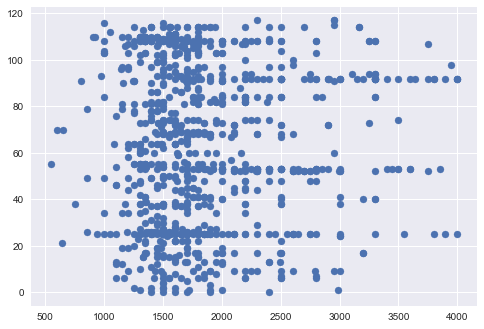

In [42]:
x = df_monthly_rates['price']
y = df_monthly_rates['area']
plt.scatter(x, y)
plt.show()

#### Histograms

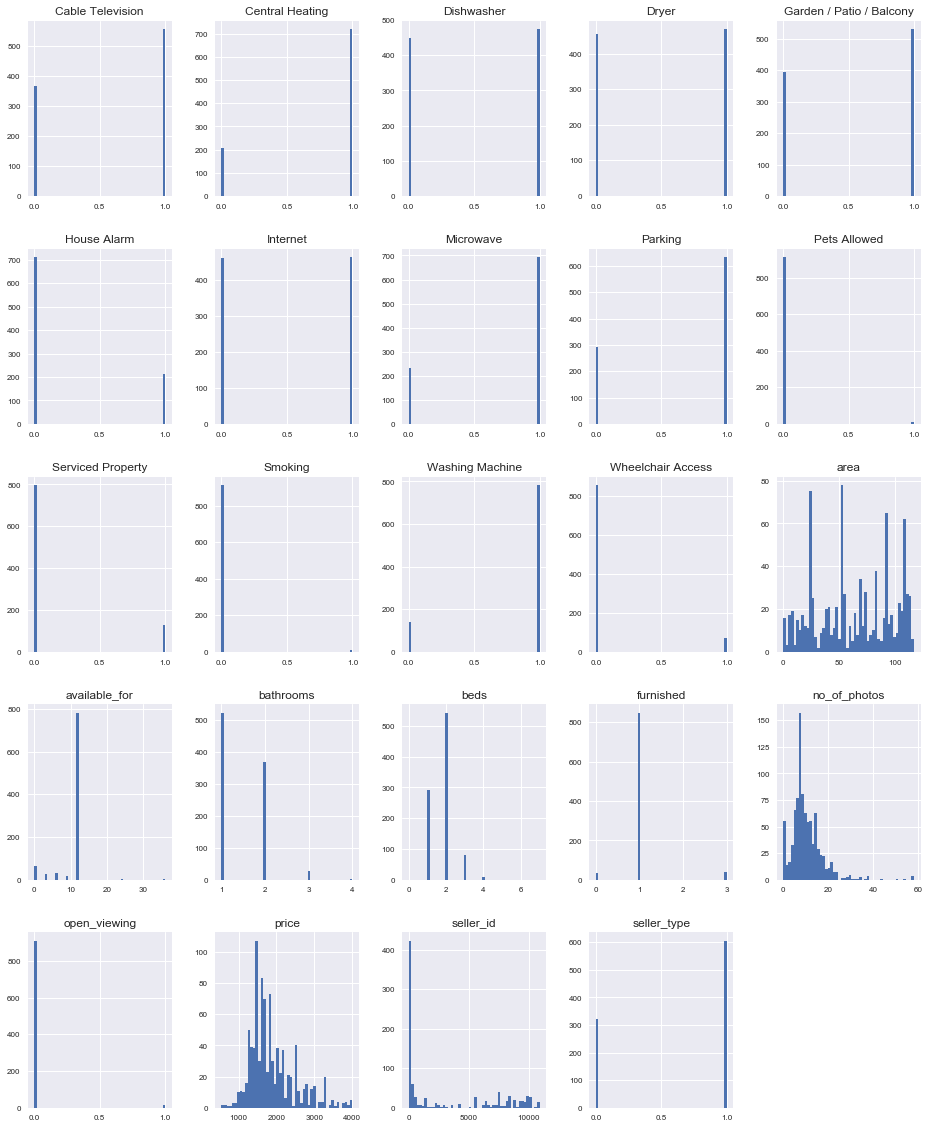

In [43]:
df_monthly_rates.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

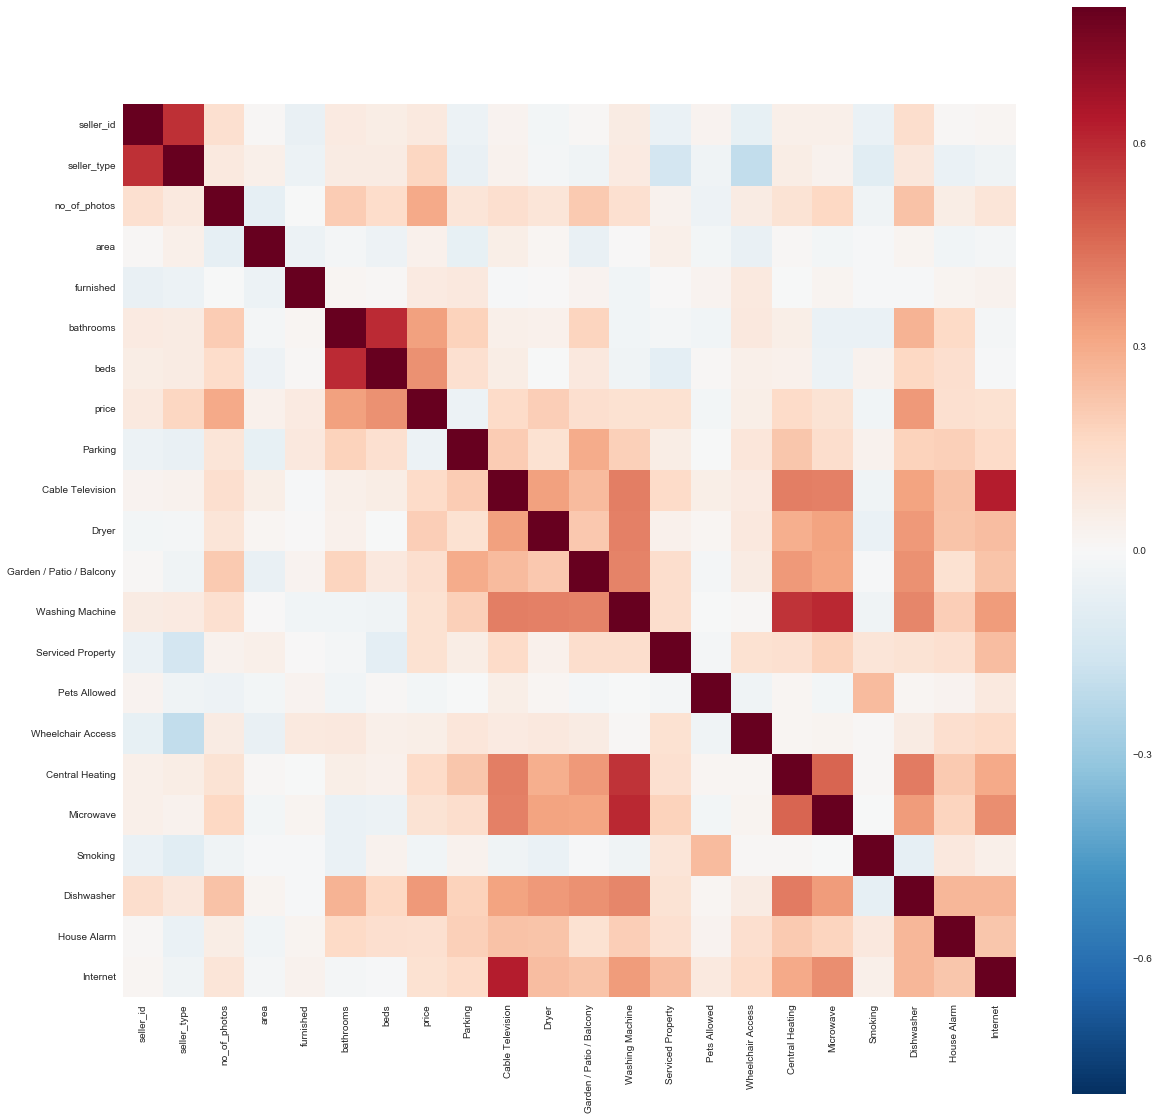

In [44]:
#correlation matrix
corrmat = df_monthly_rates.drop('available_for', 1).drop('open_viewing', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

# plt.figure(figsize=(10,10))
# foo = sns.heatmap(corrmat.corr(), vmax=0.8, square=True, annot=True)

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [45]:
df_monthly_rates['price'].describe()

count     925.000000
mean     1888.045405
std       608.912282
min       550.000000
25%      1500.000000
50%      1700.000000
75%      2200.000000
max      4000.000000
Name: price, dtype: float64

#### Show price distibution for number of beds

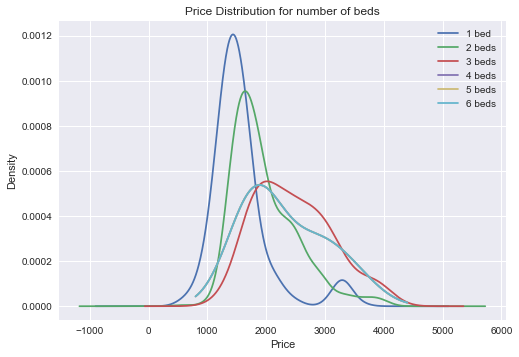

In [48]:
df_monthly_rates.price[(df_monthly_rates.beds == 1.0)].plot(kind='kde', label='1 bed')    
df_monthly_rates.price[(df_monthly_rates.beds == 2.0)].plot(kind='kde', label='2 beds')      
df_monthly_rates.price[(df_monthly_rates.beds == 3.0)].plot(kind='kde', label='3 beds')      
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='4 beds') 
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='5 beds')    
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='6 beds') 

plt.xlabel("Price")    
plt.title("Price Distribution for number of beds")

plt.legend()

#### Price Distribution - Dishwasher/no Dishwasher

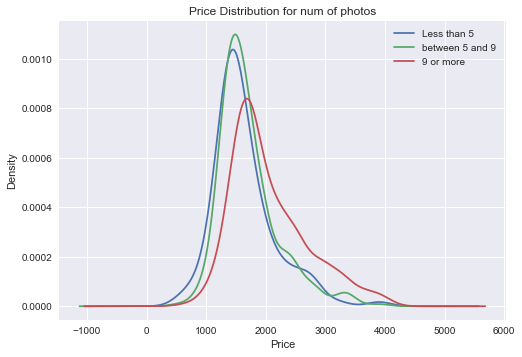

In [59]:
df_monthly_rates.price[(df_monthly_rates.no_of_photos < 5.0)].plot(kind='kde', label='Less than 5')  
df_monthly_rates.price[(df_monthly_rates.no_of_photos >= 5.0) & (df_monthly_rates.no_of_photos < 9.0)].plot(kind='kde', label='between 5 and 9')    
df_monthly_rates.price[(df_monthly_rates.no_of_photos >= 9.0)].plot(kind='kde', label='9 or more')   

plt.xlabel("Price")    
plt.title("Price Distribution for num of photos")

plt.legend()

#### Showing price distribution for the most common areas

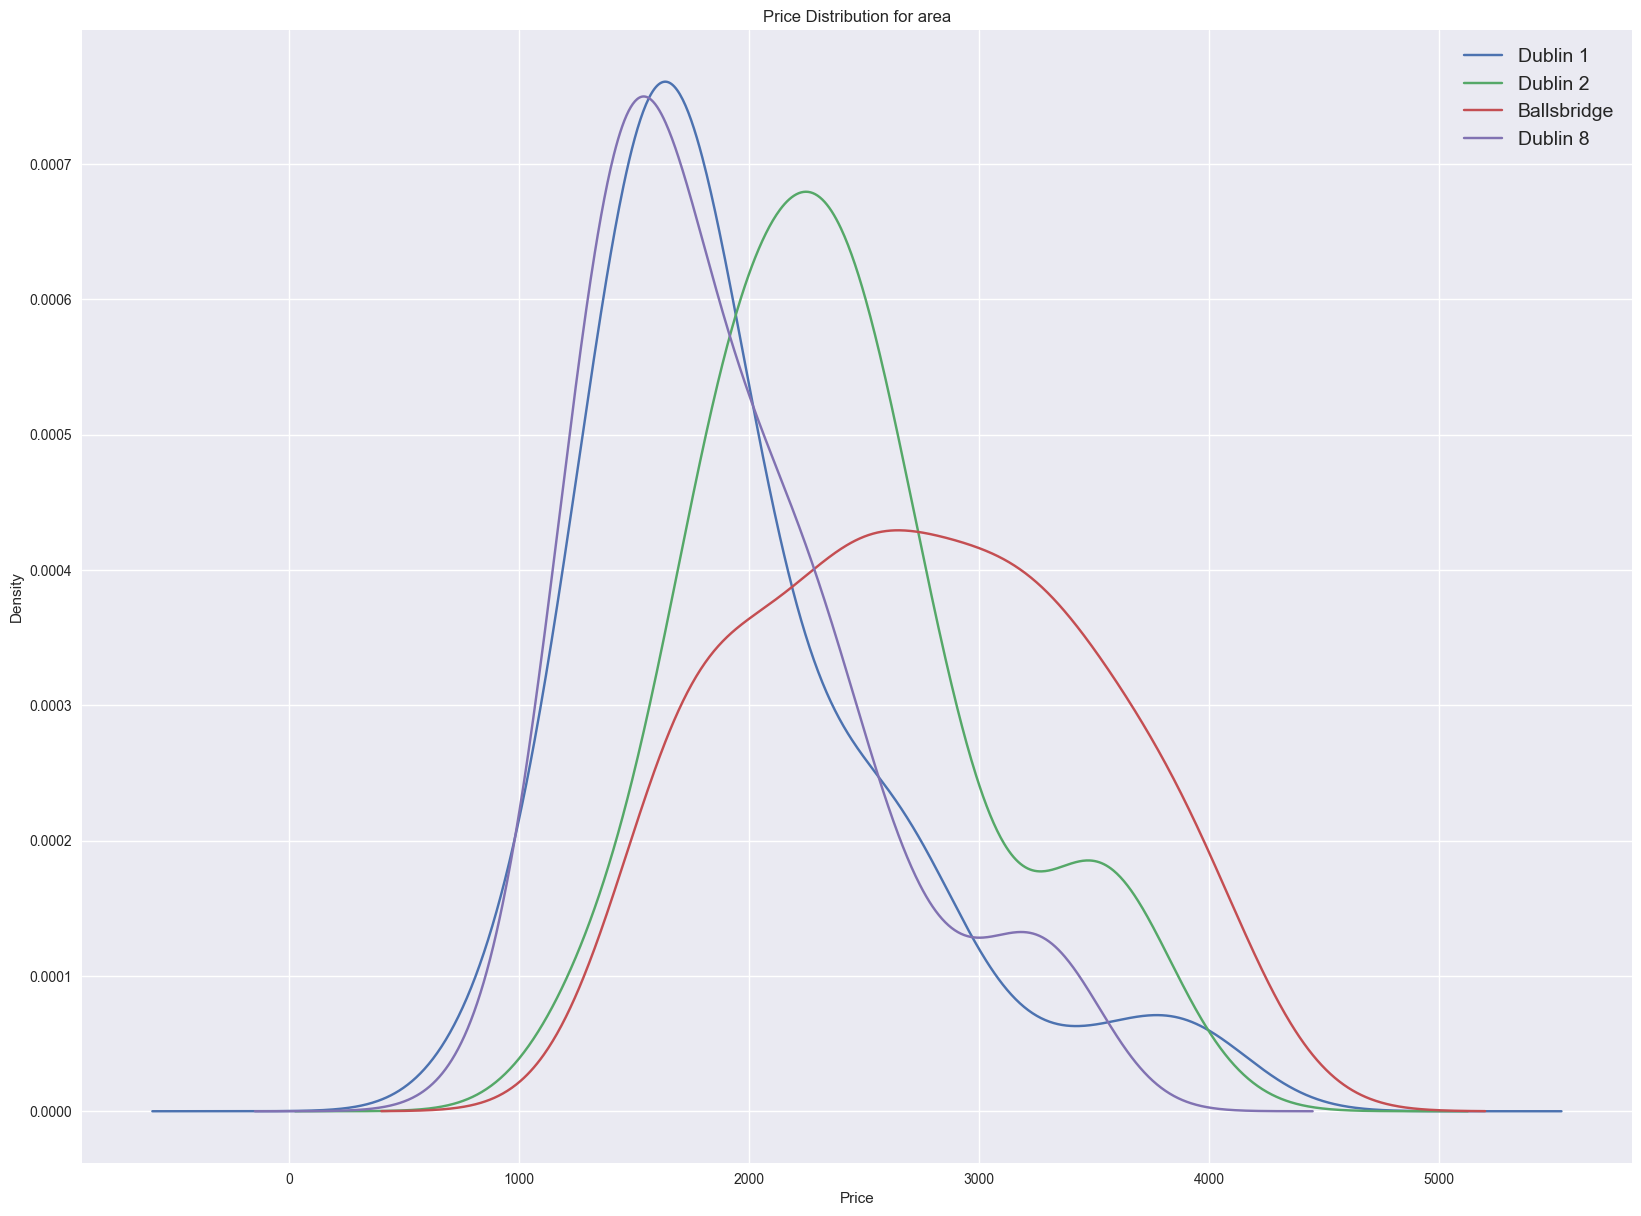

In [60]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if count > 25:
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

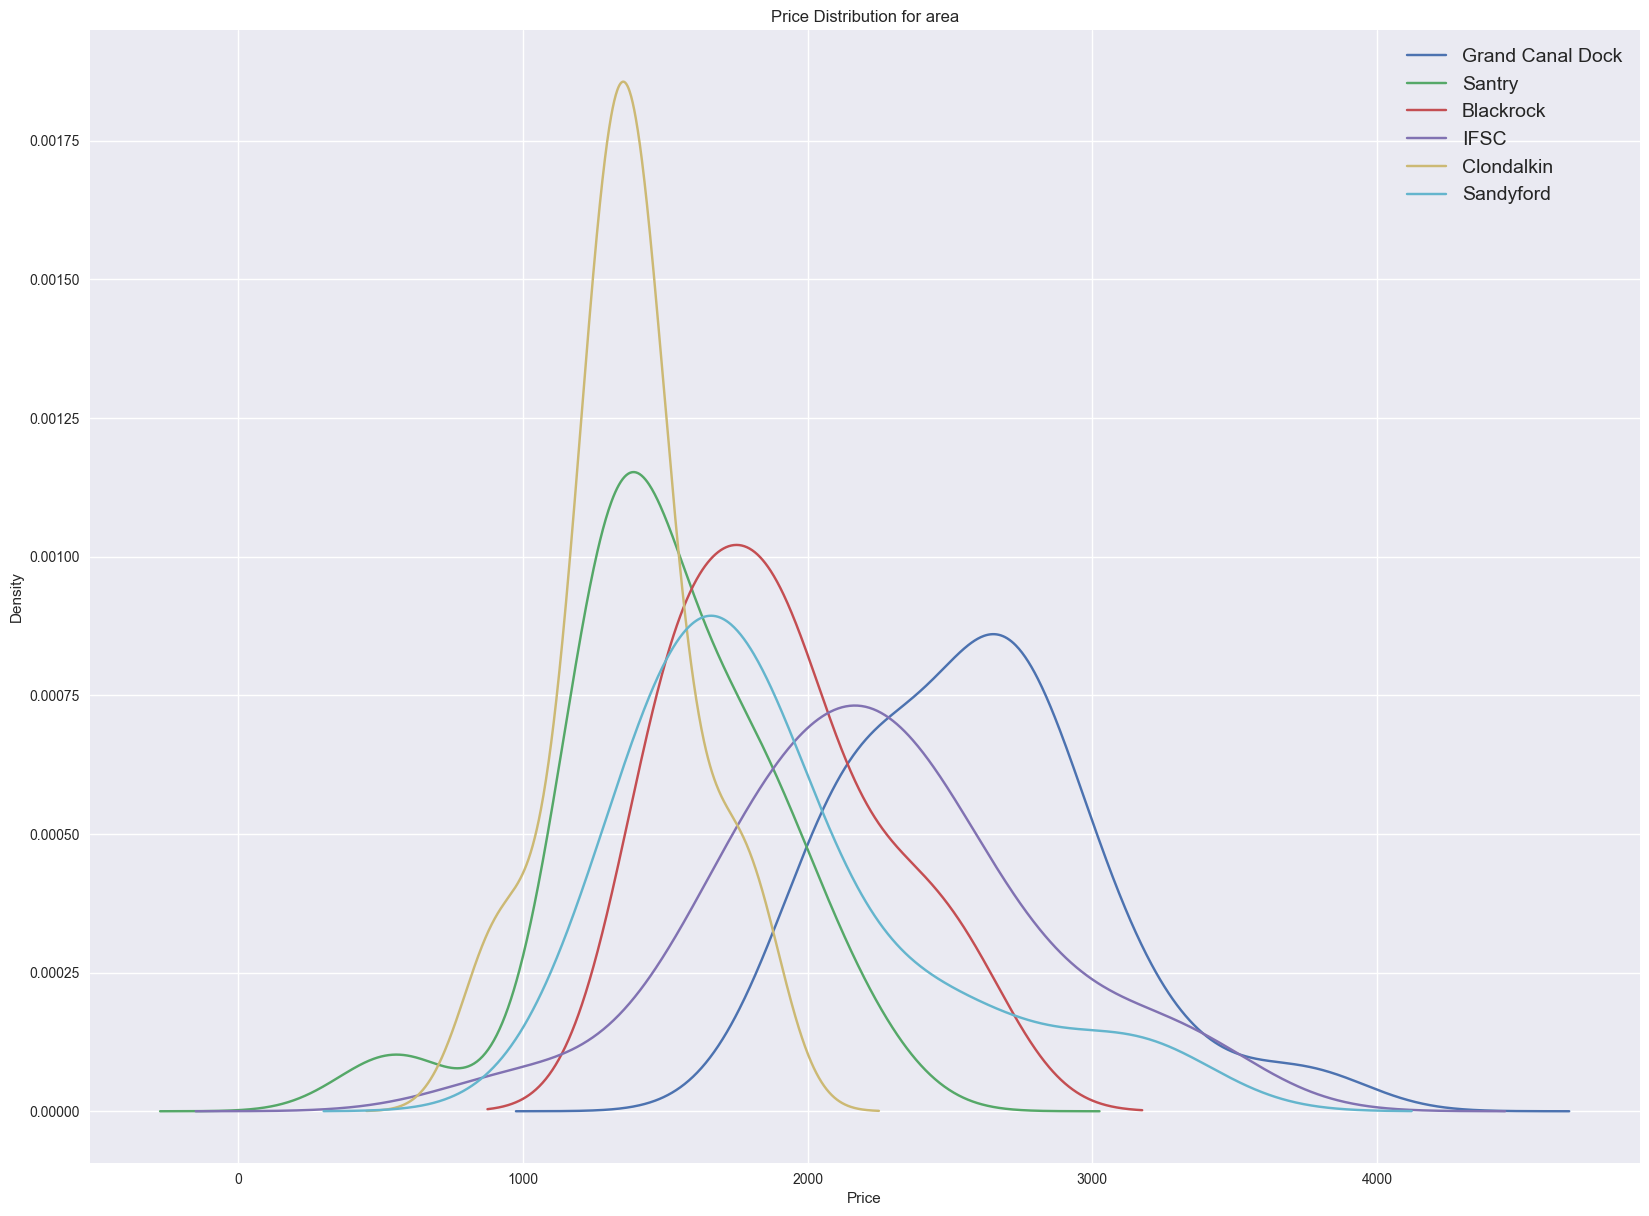

In [61]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if (count > 17) & (count <= 25 ):
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

### Save monthly wrangled data as CSV

In [62]:
df_monthly_rates.to_csv('data/cleaned_monthly.csv')